
Delhi House Price Prediction

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [50]:
df = pd.read_csv('MagicBricks.csv')
df.head()


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0



Data Preprocessing 1

In [51]:
df.shape

(1259, 11)

In [52]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [53]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])


In [54]:
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)


/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/2092832132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/2092832132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [55]:
df.isnull().sum()


Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [56]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [57]:
df[['Parking', 'Bathroom']].astype('int64')


,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [58]:
df.nunique()


Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [59]:
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Furnishing'].value_counts(),'\n', df['Status'].value_counts(),'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: count, Length: 315, dtype: int64 
 BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64 
 Bathroom
2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64 
 Parking
1.0      829
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64 
 Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64 
 Status
Ready_to_move    1184
Almost_ready       75
Name: count, dtype: int64 
 Transaction
Resale          781
New_Property    478
Name: count, dtype: int64 
 Type
Builder_Floor    666
Apartment        593
Name: count, dtype: int64 
 Per_Sqft
12500.000000    37
3524.000000     28
6667.000000     27
14818.000000    

Adding new area column in Sq Yards for better understanding of area


In [60]:
df['Area_Yards'] = df['Area']/9

In [61]:
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

Since there are so many localities in the dataset, I have decided to take only top 10 localities and list the remaining localities as 'other' in the dataset


In [62]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)


In [63]:
df['Locality'].value_counts()

Locality
Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [64]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]


In [65]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [66]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


Exploratory Data Analysis


Area of Houses

Text(0.5, 1.0, 'Area in Yards')

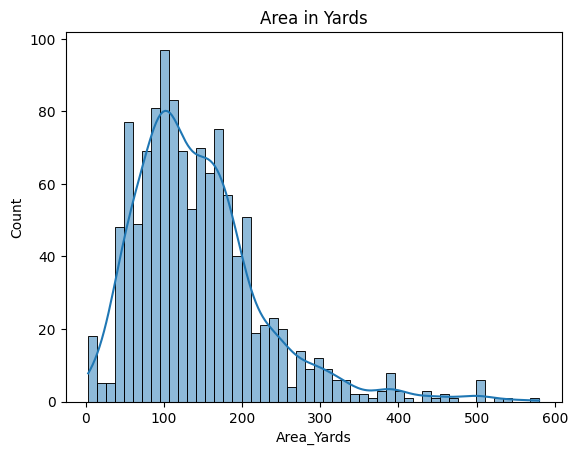

In [67]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')


BHK

Text(0.5, 1.0, 'BHK')

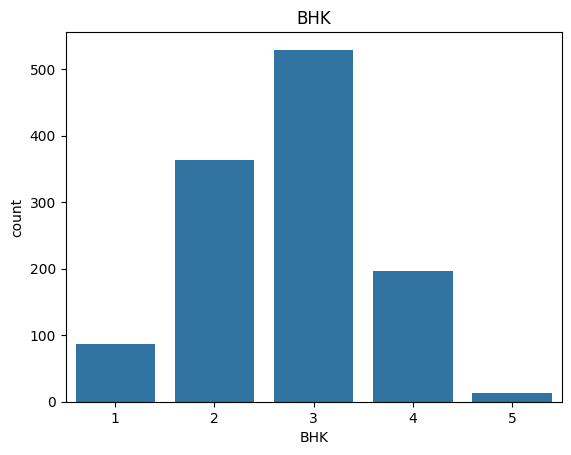

In [68]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')


Bathroom Count

Text(0.5, 1.0, 'Bathroom')

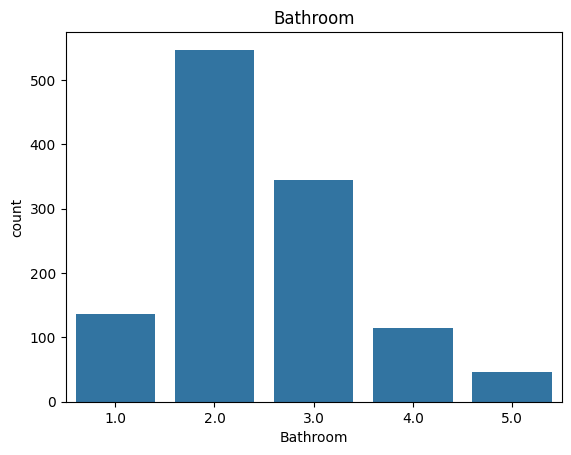

In [69]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')



Furnishing

Text(0.5, 1.0, 'Furnishing')

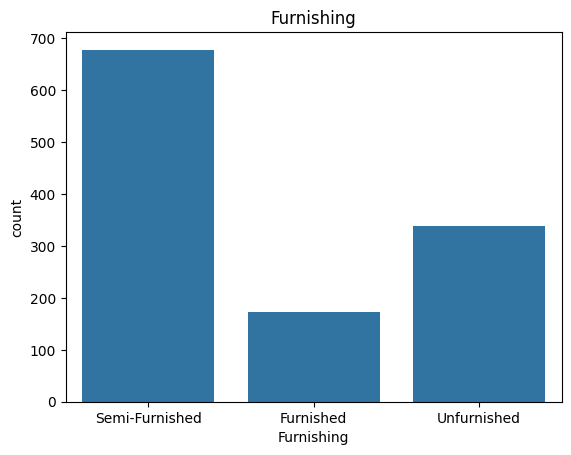

In [70]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')


Locality

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

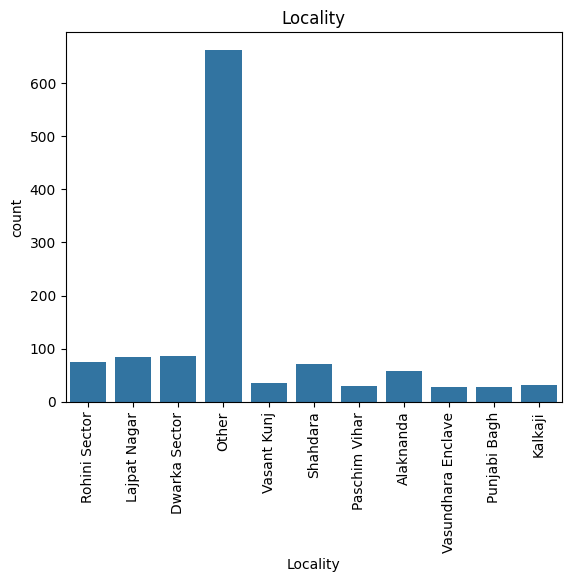

In [71]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)



Parking

Text(0.5, 1.0, 'Parking')

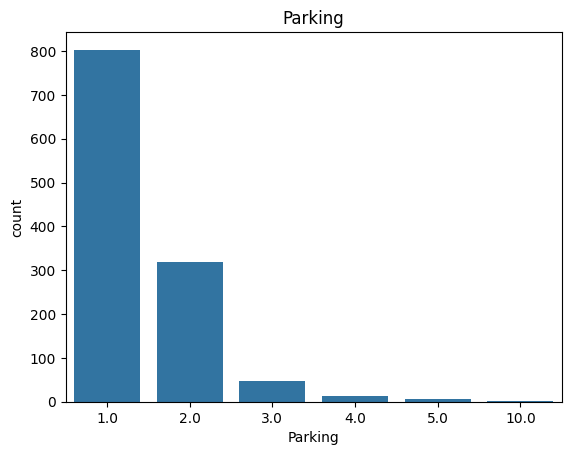

In [72]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')



Status

Text(0.5, 1.0, 'Status of the Property')

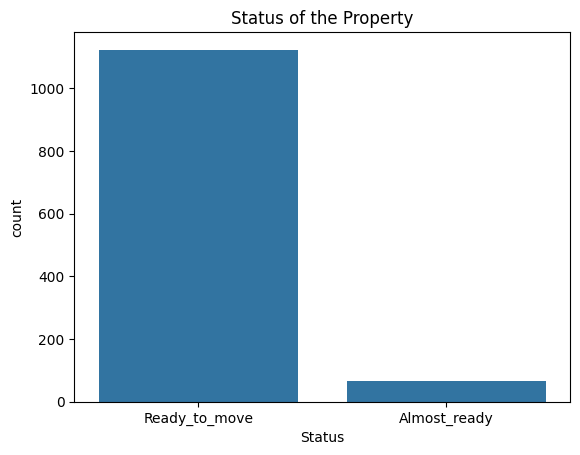

In [73]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')



Transaction Type

Text(0.5, 1.0, 'Transaction Type')

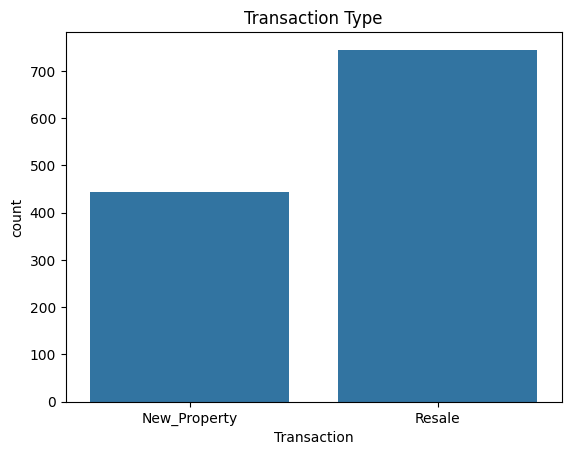

In [74]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')


House Type

Text(0.5, 1.0, 'Type of House')

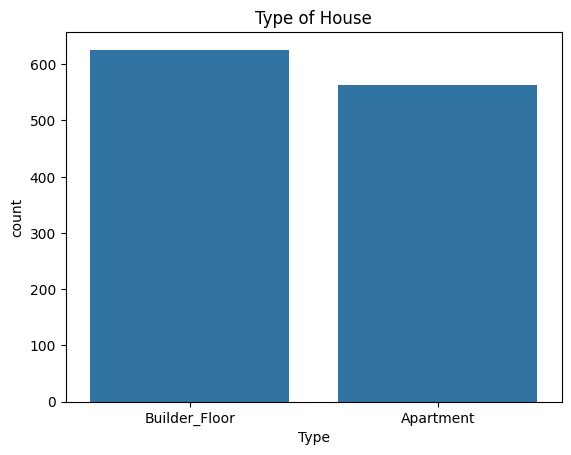

In [75]:
sns.countplot(x='Type',data=df).set_title('Type of House')


Area and Price

<Axes: xlabel='Area_Yards', ylabel='Price'>

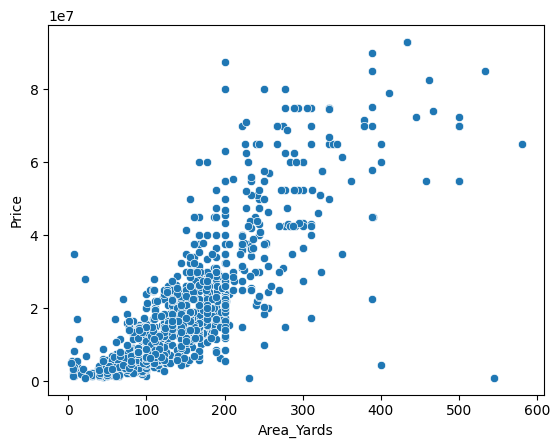

In [76]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)


BHK and Price

Text(0.5, 1.0, 'BHK vs Price')

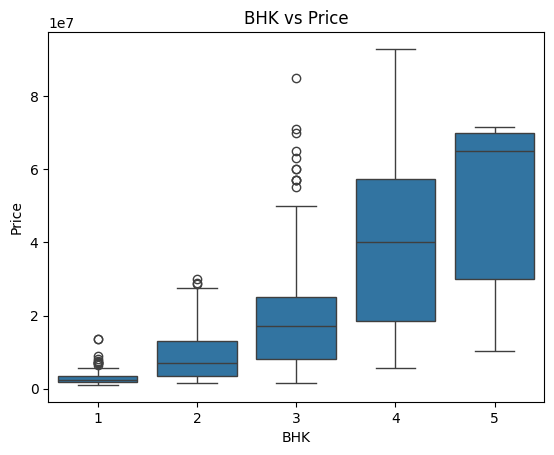

In [77]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')


Bathroom count and Price

Text(0.5, 1.0, 'Bathroom vs Price')

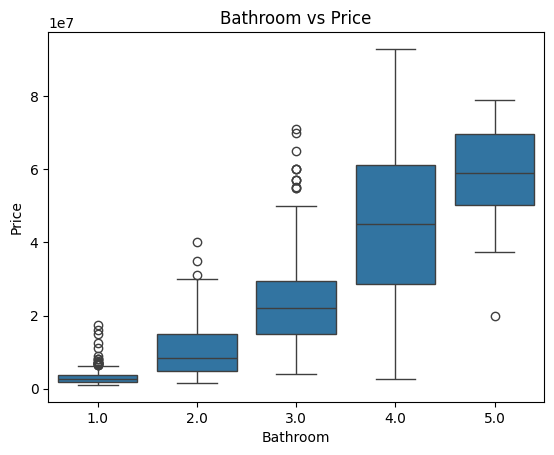

In [78]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')


Parking and Price

Text(0.5, 1.0, 'Parking vs Price')

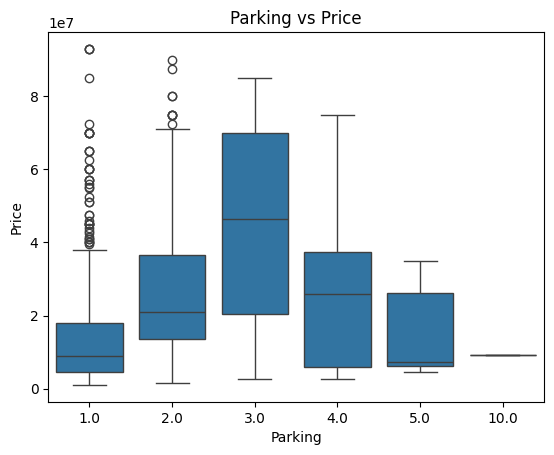

In [79]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

Locality and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

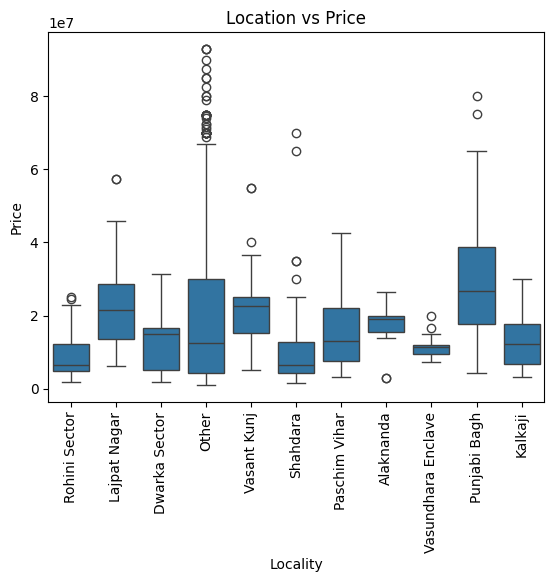

In [80]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)


Furnishing and Price

Text(0.5, 1.0, 'Furnishing vs Price')

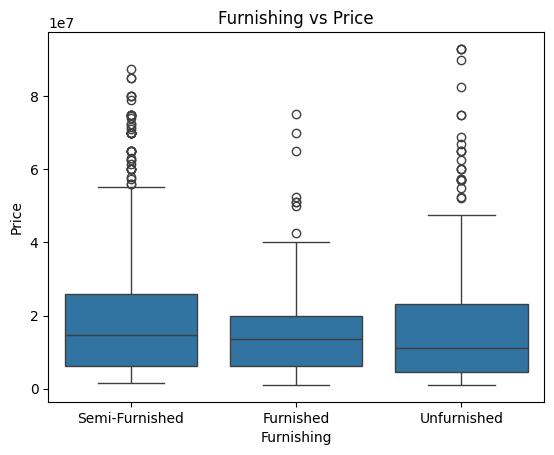

In [81]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')


Status and Price

Text(0.5, 1.0, 'Price vs Status')

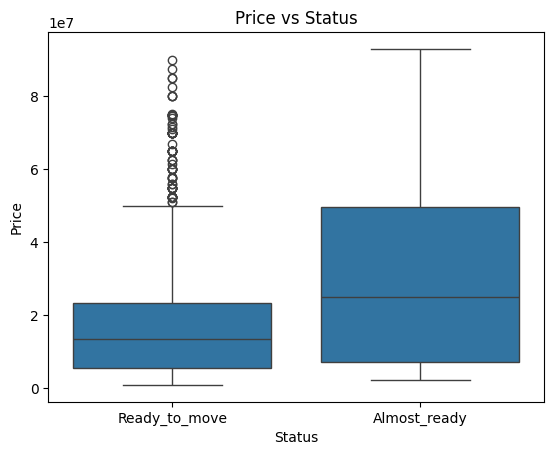

In [82]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')


Transaction Type and Price

Text(0.5, 1.0, 'Transaction vs Price')

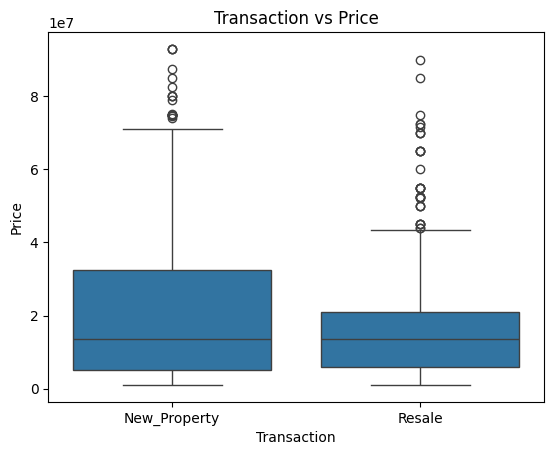

In [83]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')


Property Type and Price

Text(0.5, 1.0, 'Price vs Type')

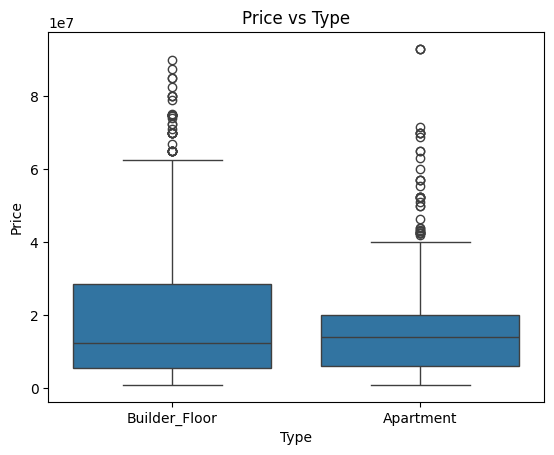

In [84]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')


Data Preprocessing 2
Label encoding the categorical variables

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


Normalizing the continuous features

In [86]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])


In [87]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2.0,1,7,1.0,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2.0,1,7,1.0,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2.0,0,7,1.0,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2.0,1,7,1.0,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2.0,1,7,1.0,0.056522,1,0,1,0.076565,0.119800



Coorelation Matrix Heatmap

<Axes: >

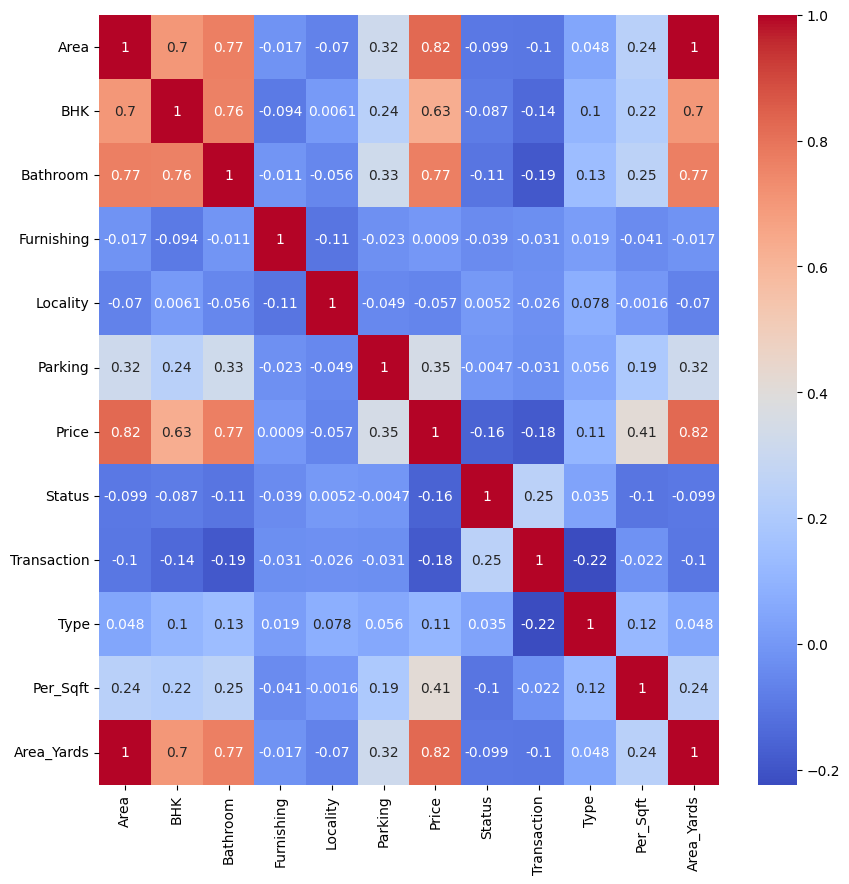

In [88]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Train Test Split

In [89]:
df.drop(['Per_Sqft'],axis=1,inplace=True)


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)


Price Prediction
I will be using the following models:

Decision Tree Regressor
Random Forest Regressor

Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()


Hypertuning the model with GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

In [93]:
dtr = DecisionTreeRegressor( max_depth=6, max_features='auto', min_samples_leaf = 1, min_samples_split = 8, random_state=42)
dtr


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=8,
                      random_state=42)

In [95]:
from sklearn.tree import DecisionTreeRegressor

# Create the DecisionTreeRegressor model with a valid max_features parameter
dtr = DecisionTreeRegressor(max_features=None)  # or 'sqrt', 'log2', or an int/float

# Training the model
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [96]:
# Training Accuracy
dtr.score(X_train, y_train)

0.9904425280044203

In [97]:
d_pred = dtr.predict(X_test)


Evaluting Decision Tree Regressor Model

In [98]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)


,Actual,Predicted
0,0.190217,0.097826
1,0.597826,0.505435
2,0.076087,0.082065
3,0.009239,0.005435
4,0.028261,0.010870
5,0.641304,0.641304
6,0.217391,0.423913
7,0.157609,0.173913
8,0.695652,0.244565
9,0.039348,0.039348


/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/2430284863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/2430284863.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

<Axes: xlabel='Predicted', ylabel='Density'>

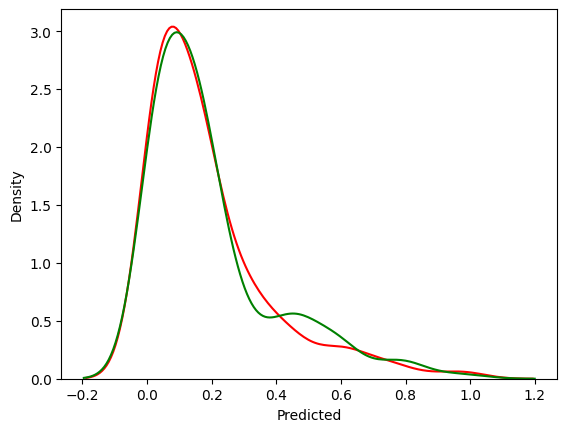

In [99]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)


In [100]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))


R2 Score:  0.7307452115386723
Mean Squared Error:  0.009884652118369402
Mean Absolute Error:  0.057050070028011206
Root Mean Squared Error:  0.09942158778841445


Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr


RandomForestRegressor()

In [102]:
# Training the model
rfr.fit(X_train, y_train)


RandomForestRegressor()

In [103]:
rfr.score(X_train,y_train)

0.9632281261586695

In [104]:
r_pred = rfr.predict(X_test)


Evaluating the Random Forest Regressor Model

In [105]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)


,Actual,Predicted
0,0.190217,0.173641
1,0.597826,0.494120
2,0.076087,0.084511
3,0.009239,0.027080
4,0.028261,0.015714
5,0.641304,0.597087
6,0.217391,0.330264
7,0.157609,0.168774
8,0.695652,0.322500
9,0.039348,0.039246


/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/3453460830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
/var/folders/4d/_9n8z7mn3y9bqgsys9x2msy80000gn/T/ipykernel_33895/3453460830.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

<Axes: xlabel='Predicted', ylabel='Density'>

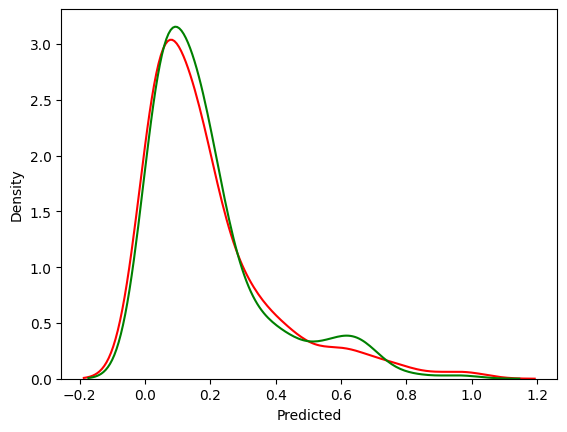

In [106]:
ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dfr['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)


In [107]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))


R2 Score:  0.840922257899069
Mean Squared Error:  0.005839926373934227
Mean Absolute Error:  0.04676589032516827
Root Mean Squared Error:  0.07641941097610101


Conclusion

From the exploratory data analysis, we can conclude that the following features are important for predicting the price of a house in Delhi:

Area

BHK

Locality

From the EDA it was also found that, most of the houses in delhi are small having area between 100 to 200 sq. yards having 2-3 BHK. The price of the houses in localities such as Punjabi Bagh, Lajpat nagar and Vasant Kunj are high as compared to other localities, which means these are posh areas of Delhi. Most of the people prefer a new builder floor property despite the aprtments cost the same because people want to design their house according to their own needs and requirements and want more privacy and independency.

Coming to the machine learning models, I have used regression models - Decision Tree Regressor and Random Forest Regressor. The Random Forest regressor performed better than the Decision Tree Regressor with an accuracy of 84.98%